In [47]:
import pandas as pd
from pandas.api.types import CategoricalDtype
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

#### Note that I am using the prepped files instead

In [75]:
df_train = pd.read_csv('train_prepped.csv', index_col=0)
df_test = pd.read_csv('test_prepped.csv', index_col=0)
df_sample_submit = pd.read_csv('gender_submission.csv', index_col=0)

In [49]:
df_train.head(3)

,Unnamed: 0,Pclass,Age,SibSp,Parch,Fare,Sex_Id,Age_Label_Id,TtlFamMbr,Title_Id,Survived
0,0,3,22,1,0,7.2500,0,4,1,11,0
1,1,1,38,1,0,71.2833,1,5,1,12,1
2,2,3,26,0,0,7.9250,1,4,0,8,1


In [50]:
df_test.head(3)

,Unnamed: 0,Pclass,Age,SibSp,Parch,Fare,Sex_Id,Age_Label_Id,TtlFamMbr,Title_Id
0,0,3,34,0,0,7.8292,0,4,0,5
1,1,3,47,1,0,7.0000,1,5,1,6
2,2,2,62,0,0,9.6875,0,6,0,5


#### Generate Train and Test datasets

In [51]:
X_train, X_test, y_train, y_test = train_test_split(
    df_train.drop('Survived', axis=1), 
    df_train['Survived'], test_size=0.33, random_state=42)

## Linear Regression model

In [52]:
lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [53]:
pred = lr.predict(X_test)
mse1 = np.mean((pred - y_test)**2)
print('mse1: ', mse1)
mse2 = mean_squared_error(y_test, pred)
print('mse2: ', mse2)

mse1:  0.12714386716304749
mse2:  0.12714386716304749


In [54]:
print('Coefficients: \n', lr.coef_)

Coefficients: 
 [ 3.16475646e-05 -1.34896124e-01  3.40232599e-03 -1.79483291e-02
 -1.06513568e-02  6.97139727e-04  5.15727470e-01 -1.23644133e-01
 -2.85996859e-02  3.43596131e-03]


In [55]:
print('R-square: ', lr.score(X_test, y_test))

R-square:  0.4731097600064663


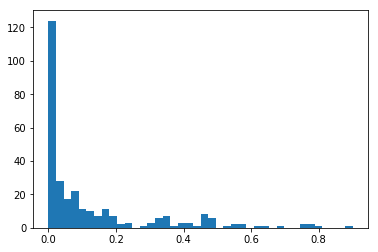

In [56]:
plt.hist((pred-y_test)**2, bins=40);

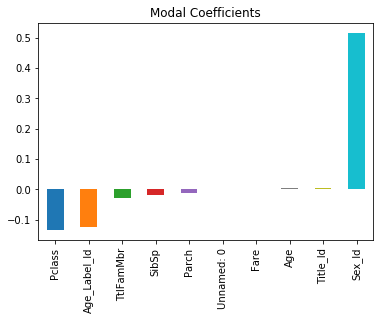

In [57]:
# checking the magnitude of coefficients
pred_cols = X_train.columns
coef = pd.Series(lr.coef_,pred_cols).sort_values()
coef.plot(kind='bar', title='Modal Coefficients')

## Ridge Regression

In [58]:
rr = Ridge(alpha=0.05, normalize=False)
rr.fit(X_train, y_train)

Ridge(alpha=0.05, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [59]:
pred = rr.predict(X_test)
mse1 = np.mean((pred - y_test)**2)
print('mse1: ', mse1)
mse2 = mean_squared_error(y_test, pred)
print('mse2: ', mse2)

mse1:  0.12714539788313114
mse2:  0.12714539788313117


In [60]:
print('Coefficients: \n', rr.coef_)

Coefficients: 
 [ 3.16207705e-05 -1.34892712e-01  3.39696600e-03 -1.79652679e-02
 -1.06220650e-02  6.97384590e-04  5.15490425e-01 -1.23563066e-01
 -2.85873329e-02  3.41656546e-03]


In [61]:
print('R-square: ', rr.score(X_test, y_test))

R-square:  0.4731034166295481


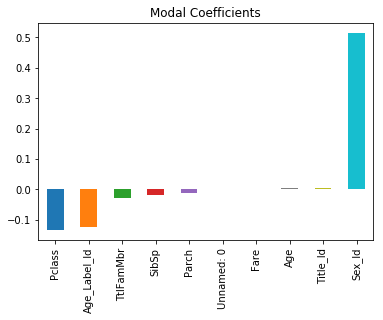

In [62]:
# checking the magnitude of coefficients
pred_cols = X_train.columns
coef = pd.Series(rr.coef_,pred_cols).sort_values()
coef.plot(kind='bar', title='Modal Coefficients')

## Lasso Regression

In [63]:
lsr = Lasso(alpha=0.05, normalize=False)
lsr.fit(X_train, y_train)

Lasso(alpha=0.05, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [64]:
pred = lsr.predict(X_test)
mse1 = np.mean((pred - y_test)**2)
print('mse1: ', mse1)
mse2 = mean_squared_error(y_test, pred)
print('mse2: ', mse2)

mse1:  0.15809216275125865
mse2:  0.15809216275125862


In [65]:
print('Coefficients: \n', lsr.coef_)

Coefficients: 
 [ 2.64491675e-05 -5.40633108e-02 -2.92798904e-03 -0.00000000e+00
 -0.00000000e+00  1.48494597e-03  2.72449873e-01 -0.00000000e+00
 -1.26498586e-02 -2.55042907e-03]


In [66]:
print('R-square: ', lsr.score(X_test, y_test))

R-square:  0.34485854936055804


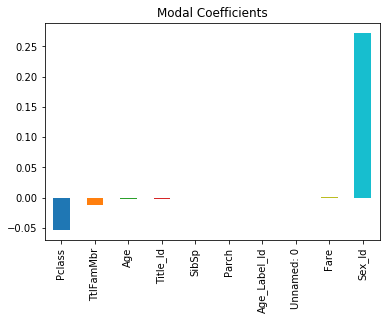

In [67]:
# checking the magnitude of coefficients
pred_cols = X_train.columns
coef = pd.Series(lsr.coef_,pred_cols).sort_values()
coef.plot(kind='bar', title='Modal Coefficients')

## Elastic Net

In [68]:
enr = ElasticNet(alpha=1.0, l1_ratio=0.05)
enr.fit(X_train, y_train)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.05,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [69]:
pred = enr.predict(X_test)
mse1 = np.mean((pred - y_test)**2)
print('mse1: ', mse1)
mse2 = mean_squared_error(y_test, pred)
print('mse2: ', mse2)

mse1:  0.1983287390690264
mse2:  0.19832873906902648


In [70]:
print('Coefficients: \n', enr.coef_)

Coefficients: 
 [ 3.04925869e-06 -2.22705611e-02 -2.87795852e-03 -6.13001553e-03
  0.00000000e+00  2.02374859e-03  4.88212745e-02 -0.00000000e+00
 -3.17118694e-03 -1.25997573e-02]


In [71]:
print('R-square: ', enr.score(X_test, y_test))

R-square:  0.1781162610722843


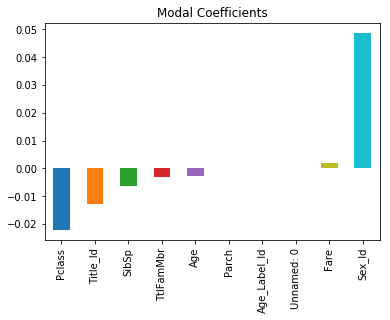

In [72]:
# checking the magnitude of coefficients
pred_cols = X_train.columns
coef = pd.Series(enr.coef_,pred_cols).sort_values()
coef.plot(kind='bar', title='Modal Coefficients')